In [1]:
import numpy as np
import pandas as pd

from scipy.stats import normaltest

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [2]:
df = pd.read_csv('data/internship_train.csv')

## Overview

In [3]:
# First, let's look at the size of the data
df.shape

(90000, 54)

In [4]:
# Let's look at the first 5 rows. Transpose to show all columns.
df.head().T

,0,1,2,3,4
0,236.000000,386.000000,429.000000,414.000000,318.000000
1,488.000000,206.000000,49.000000,350.000000,359.000000
2,16.000000,357.000000,481.000000,481.000000,20.000000
3,221.000000,232.000000,111.000000,370.000000,218.000000
4,382.000000,1.000000,111.000000,208.000000,317.000000
5,97.000000,198.000000,146.000000,158.000000,301.000000
6,-4.472136,7.810250,8.602325,8.306624,8.124038
7,0.107472,0.763713,0.651162,0.424645,0.767304
8,0.000000,1.000000,1.000000,1.000000,1.000000
9,132.000000,143.000000,430.000000,340.000000,212.000000


In [5]:
# Print information about the data types
df.dtypes

0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6         float64
7         float64
8           int64
9           int64
10          int64
11          int64
12          int64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
target    float64
dtype: object

In [6]:
# Let's look at the descriptive statistical information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.423944,144.336393,0.000000,125.000000,250.000000,374.000000,499.000000
1,90000.0,250.236267,144.022200,0.000000,126.000000,251.000000,375.000000,499.000000
2,90000.0,248.637289,144.107577,0.000000,124.000000,248.000000,374.000000,499.000000
3,90000.0,249.736600,144.284945,0.000000,125.000000,250.000000,375.000000,499.000000
4,90000.0,249.436178,143.941581,0.000000,125.000000,250.000000,373.000000,499.000000
5,90000.0,249.656167,144.329168,0.000000,124.000000,250.000000,374.000000,499.000000
6,90000.0,-0.011402,7.038171,-9.949874,-7.071068,0.000000,7.000000,9.949874
7,90000.0,0.498548,0.288682,0.000014,0.248932,0.497136,0.747513,0.999987
8,90000.0,0.499189,0.500002,0.000000,0.000000,0.000000,1.000000,1.000000
9,90000.0,249.842033,144.612718,0.000000,124.000000,250.000000,376.000000,499.000000


The values in columns '0'-'5' and '9'-'12' of int type, and the values in columns '13'-'52' of float type are similar in terms of mean, standard deviation, and percentile values.
The exceptions are columns '6', '7', '8'

In [7]:
# Number of blank data in each column
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
target    0
dtype: int64

## Categorical variables

In [8]:
# Check for unique values in column '8'.
df['8'].unique()

array([0, 1])

The variable '8' is a categorical variable. 

We will store numerical, categorical and target features in separate variables.

In [9]:
numeric_features = list(df.columns)
numeric_features.remove('8')
numeric_features.remove('target')
categorical_features = '8'
target = 'target'
print(f'numeric_features:\n{numeric_features}\n\ncategorical_features:\n{categorical_features}\n\ntarget:\n{target}')

numeric_features:
['0', '1', '2', '3', '4', '5', '6', '7', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']

categorical_features:
8

target:
target


In [10]:
# Consider the distribution of a categorical variable
for i in categorical_features:
    display(df[i].value_counts(normalize = True).round(3))

0    0.501
1    0.499
Name: 8, dtype: float64

The categorical variable is distributed evenly.

In [11]:
# Let's check whether the categorical variable '8' correlates with the objective
df.loc[:, ['8', 'target']].corr().style.background_gradient() 

,8,target
8,1.000000,0.000347
target,0.000347,1.000000


There is no linear correlation with the objective function.

In [12]:
# Let's check whether the categorical variable '8' correlates with the numerical variables
corr = df.corr()
pd.DataFrame(corr.loc[categorical_features]).T.style.background_gradient(axis = 1) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
8,0.008011,0.004095,0.001983,0.000966,0.004763,-0.002289,0.940016,0.000779,1.000000,-0.007370,-0.000039,0.000917,-0.001828,-0.002151,-0.005755,-0.001467,-0.007458,-0.002495,0.001364,0.002937,0.006348,-0.000636,0.001197,0.004145,-0.001407,0.000994,-0.003373,-0.000031,-0.001634,0.000800,0.002236,0.004119,0.004824,-0.006101,-0.005344,-0.004440,-0.004190,0.000911,0.002107,0.001692,-0.001800,0.001696,-0.003562,0.006776,0.000357,-0.001796,0.006837,-0.003748,-0.002903,0.004119,0.000960,0.000786,0.001725,0.000347


Variable '8' has strong linear correlation with variable '6'.

## Numeric variables

Let's check the distribution of features using density plots.

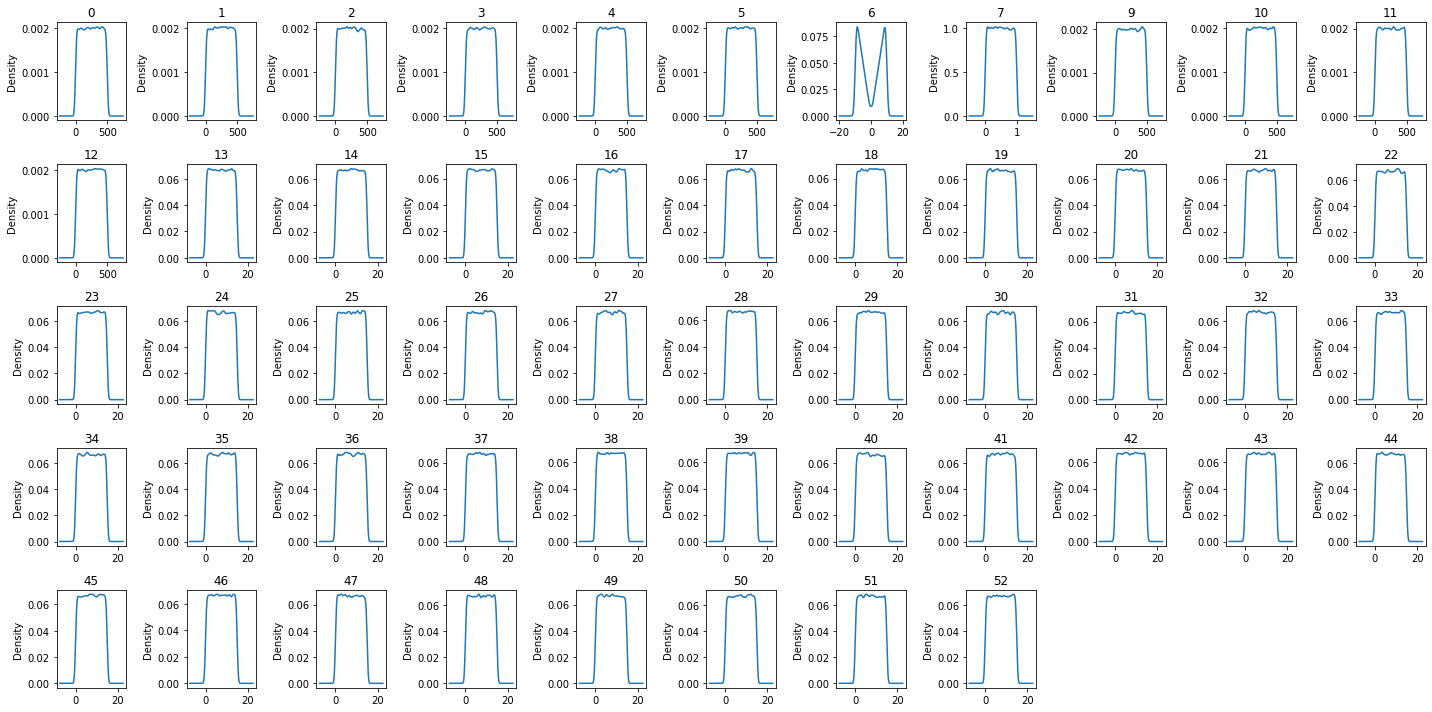

In [13]:
fig, ax = plt.subplots(5, 11, figsize = (20, 10))
row = col = 0
for i, n_feature in enumerate(numeric_features):
    if (i % 11 == 0) & (i > 0):
        row += 1
        col = 0
    df[n_feature].plot(kind = "kde", ax = ax[row, col])
    ax[row, col].set_title(n_feature)
    col += 1

for c in range(col ,11):
    ax[row, c].axis('off')

plt.tight_layout()
plt.show()

All variables except column 6 look close to a Gaussian distribution. 
Let's test the data for a normal distribution.

In [14]:
for i in numeric_features:
    print(f'{i}: {"Not Gaussian" if normaltest(df[i].values)[1] < 0.05 else "Gaussian"}  {normaltest(df[i].values)}')

0: Not Gaussian  NormaltestResult(statistic=78395.8503573945, pvalue=0.0)
1: Not Gaussian  NormaltestResult(statistic=74327.15302819488, pvalue=0.0)
2: Not Gaussian  NormaltestResult(statistic=75291.20977391666, pvalue=0.0)
3: Not Gaussian  NormaltestResult(statistic=78930.29877964167, pvalue=0.0)
4: Not Gaussian  NormaltestResult(statistic=77136.65327726235, pvalue=0.0)
5: Not Gaussian  NormaltestResult(statistic=79181.85192494628, pvalue=0.0)
6: Not Gaussian  NormaltestResult(statistic=405727.5354384747, pvalue=0.0)
7: Not Gaussian  NormaltestResult(statistic=77680.58952363396, pvalue=0.0)
9: Not Gaussian  NormaltestResult(statistic=82037.3611459287, pvalue=0.0)
10: Not Gaussian  NormaltestResult(statistic=76352.22669348361, pvalue=0.0)
11: Not Gaussian  NormaltestResult(statistic=81533.72634768246, pvalue=0.0)
12: Not Gaussian  NormaltestResult(statistic=79857.03694124673, pvalue=0.0)
13: Not Gaussian  NormaltestResult(statistic=82071.27091937505, pvalue=0.0)
14: Not Gaussian  Norma

None of the numerical variables are normally distributed.

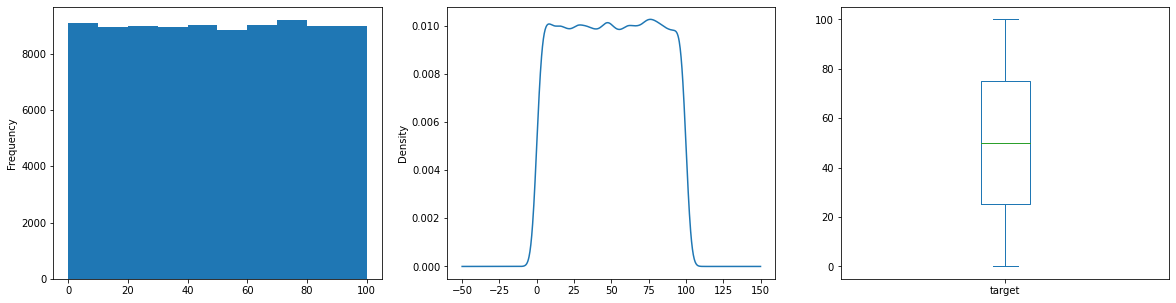

target: Not Gaussian  NormaltestResult(statistic=80940.48439238538, pvalue=0.0)


In [15]:
# Let's look at the statistics of the objective.
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
df[target].plot(kind = "hist", ax = ax[0])
df[target].plot(kind = "kde", ax = ax[1])
df[target].plot(kind = "box", ax = ax[2])
plt.show()
print(f'{target}: {"Not Gaussian" if normaltest(df[target].values)[1] < 0.05 else "Gaussian"}  {normaltest(df[target].values)}')

The distribution of the objective is visually similar to the distribution of numerical variables.

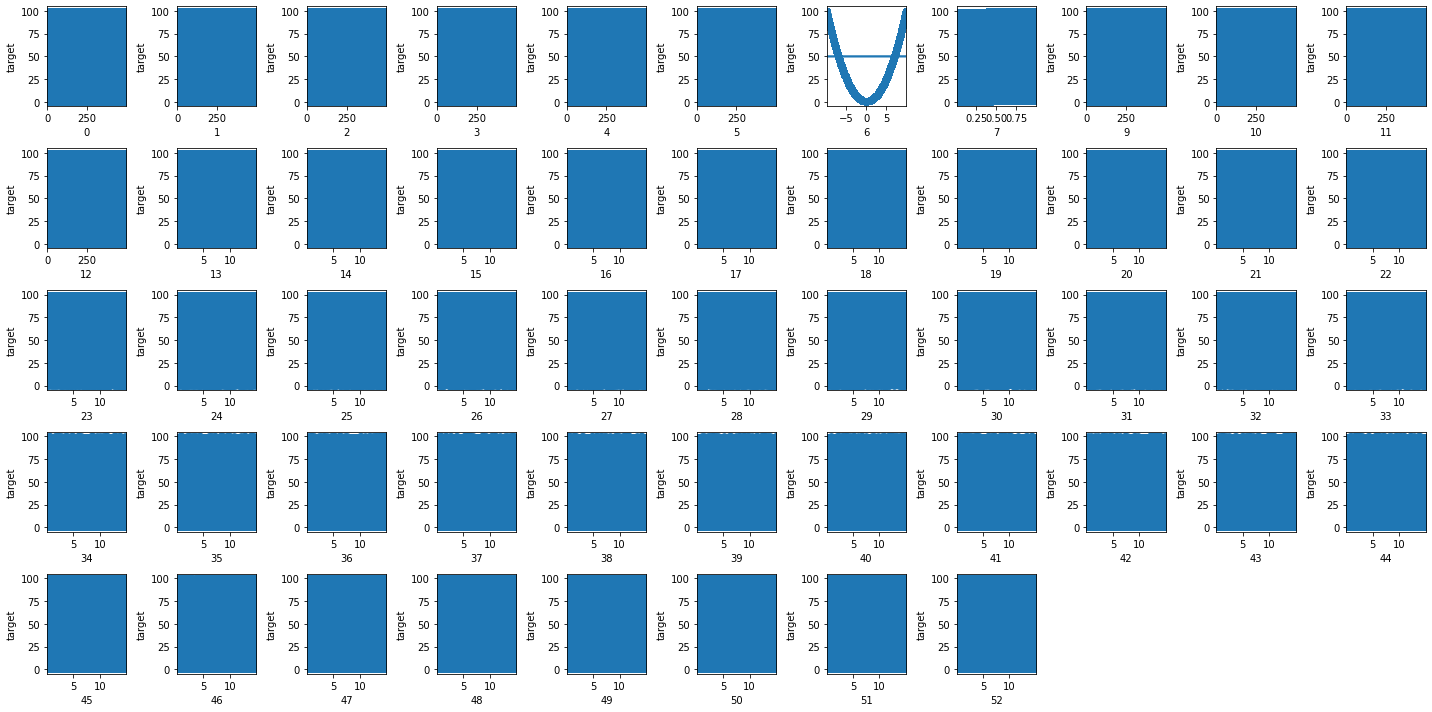

In [16]:
# Consider the relationship between numeric variables and the objective function by drawing a dot plot
fig, ax = plt.subplots(5, 11 ,figsize = (20, 10))
row = col = 0
for i, n_feature in enumerate(numeric_features):
    if (i % 11 == 0) & (i > 0):
        row += 1
        col = 0
    sns.regplot(x = n_feature, y = 'target', data = df, ax = ax[row, col], ci = False)
    col += 1
    
for c in range(col ,11):
    ax[row, c].axis('off')

plt.tight_layout()
plt.show()

The target depends quadratically on the variable '6'.

In [17]:
# Let's calculate pairwise correlations between all numerical features
corr.loc[numeric_features, numeric_features].style.background_gradient() 

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,1.000000,0.002009,0.001170,0.002957,-0.003764,-0.007362,0.007855,0.007174,0.002339,0.000066,-0.001815,0.000896,-0.000404,-0.000075,-0.000253,0.002622,0.006260,0.000741,0.002210,-0.000895,-0.007855,-0.002258,0.004361,0.002187,-0.004042,0.005097,-0.003047,0.002541,-0.001587,-0.000414,0.006611,-0.002760,0.000027,0.008256,-0.004086,-0.004529,0.003246,0.000787,0.000185,-0.002930,0.003764,-0.000167,0.001234,-0.004142,-0.006525,0.003532,0.000310,-0.002639,0.004795,0.000287,-0.001647,-0.003612
1,0.002009,1.000000,-0.001849,-0.004653,-0.002433,-0.002037,0.004181,0.005790,0.002592,-0.002682,-0.000078,0.001109,-0.004103,-0.001656,-0.000614,0.002029,0.002349,0.001863,0.000461,0.000178,-0.001536,-0.003732,0.003922,-0.004662,0.003783,-0.003006,-0.001918,-0.002799,-0.004662,0.001058,-0.002409,0.005470,0.010357,-0.002004,-0.005055,-0.000449,-0.003830,0.002414,0.006489,-0.000481,-0.002569,0.007752,-0.002425,-0.002875,-0.002679,0.001402,-0.007900,-0.004497,0.002015,0.003119,0.006038,-0.003173
2,0.001170,-0.001849,1.000000,-0.000775,0.003082,-0.002161,0.002296,-0.000299,0.005753,-0.002199,0.000317,0.005324,0.002116,0.008375,0.003951,-0.001875,-0.000639,0.001350,-0.000633,-0.000888,-0.001534,-0.000585,0.002231,0.000821,0.000266,-0.005920,0.002083,0.002801,-0.004899,0.001974,-0.002710,0.004933,-0.002065,0.005319,-0.000625,0.001144,0.003342,-0.001261,0.002653,-0.002015,0.002044,-0.002604,-0.001275,0.001092,-0.000588,0.000643,0.003106,0.001611,-0.001444,0.001006,-0.001753,0.002812
3,0.002957,-0.004653,-0.000775,1.000000,-0.003623,-0.001038,0.000223,-0.004290,0.000202,-0.004965,-0.000367,0.000916,0.000080,0.003102,0.001020,-0.007037,-0.005790,0.007506,0.001275,-0.002047,0.000044,0.004518,0.001132,0.002010,-0.006407,0.005319,-0.003369,-0.002658,-0.002173,0.001568,0.001985,0.003247,-0.003471,0.001715,-0.001856,0.001179,-0.004269,-0.003873,-0.004087,0.007568,0.004309,0.000720,0.000752,-0.005876,0.004777,0.001334,0.000528,0.006892,0.002790,0.002082,0.000373,0.002534
4,-0.003764,-0.002433,0.003082,-0.003623,1.000000,-0.000992,0.005602,-0.004459,-0.000778,-0.000388,0.001954,-0.001668,-0.000544,0.002047,0.000488,0.001208,0.001100,-0.001374,-0.000336,0.002304,0.001397,0.002999,0.001657,-0.008401,-0.002119,0.006148,-0.002811,0.000857,-0.002049,0.000079,0.003268,-0.005772,0.001476,0.001039,-0.000371,-0.006524,0.000780,-0.005631,0.002509,-0.008978,0.004317,-0.000019,-0.009656,-0.001413,0.006178,-0.000873,-0.002625,-0.001883,0.002884,-0.000702,0.001067,-0.002388
5,-0.007362,-0.002037,-0.002161,-0.001038,-0.000992,1.000000,-0.003869,-0.001455,0.004740,-0.003559,0.000507,-0.000037,-0.002532,0.000901,-0.001526,0.001329,0.000324,0.000658,-0.002281,-0.000124,0.000868,-0.001166,0.002663,0.005036,0.004169,0.005809,-0.000554,-0.004874,-0.001341,-0.000250,0.003361,0.006335,0.000679,-0.005939,0.005656,-0.000340,0.000682,0.000071,0.000860,0.004089,0.003336,-0.000008,-0.008769,-0.001160,-0.005226,-0.000776,-0.000087,-0.004682,0.000988,0.004735,-0.004100,0.004946
6,0.007855,0.004181,0.002296,0.000223,0.005602,-0.003869,1.000000,-0.002051,-0.007185,0.001613,-0.000223,-0.002390,-0.003157,-0.005814,-0.000298,-0.004747,-0.000960,-0.000464,0.003840,0.006525,-0.002993,0.000800,0.003302,-0.001978,-0.002176,-0.003016,0.002847,-0.002015,-0.000106,0.002109,0.004690,0.006170,-0.005689,-0.006711,-0.003161,-0.003249,0.000200,0.001246,0.000057,-0.000819,0.002212,-0.003423,0.004318,0.000580,-0.000033,0.005084,-0.002972,-0.002300,0.003611,0.001542,-0.000944,0.002867
7,0.007174,0.005790,-0.000299,-0.004290,-0.004459,-0.001455,-0.002051,1.000000,-0.007187,-0.005711,0.005165,0.003281,-0.000094,0.006217,-0.006649,0.000764,0.001452,0.001051,0.004264,0.007655,0.001975,0.001593,-0.001765,0.001357,-0.000769,-0.005641,-0.000741,0.006173,-0.001929,0.001318,0.002016,-0.001138,0.004111,0.002402,-0.000413,0.004828,-0.000499,-0.000003,-0.007122,0.001881,0.0

In [27]:
# Define feature selection
# Will look for potential linearly dependent variables through SelectKBest
X = df.drop(columns='target')
y = df.loc[:, 'target']
fs = SelectKBest(score_func=f_regression, k=2)

# Apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(90000, 2)


In [28]:
features_scores = sorted(zip(fs.feature_names_in_, fs.scores_), key=lambda x: x[1], reverse=True)

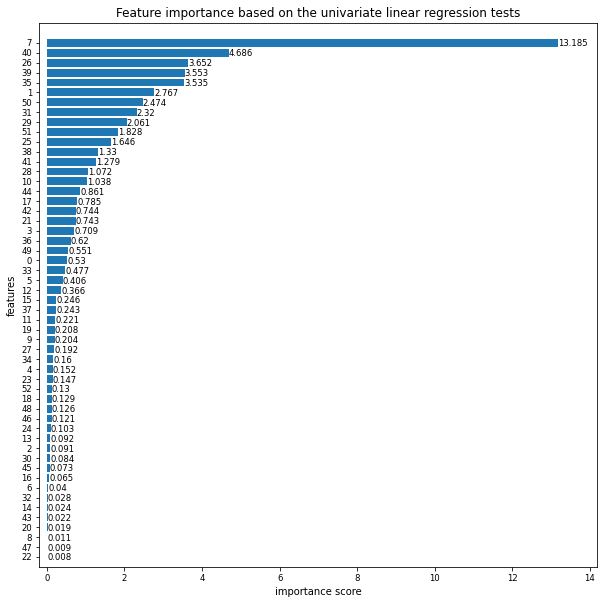

In [29]:
# visualize SelectKBest results
column_features_scores = []
score_features_scores = []
for i in range(len(features_scores)):
    column_features_scores.append(features_scores[i][0])
    score_features_scores.append(features_scores[i][1])

column_features_scores.reverse()
score_features_scores.reverse()

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.set_xlim([-0.2, score_features_scores[-1]+1])
ax.set_ylim([-1, len(column_features_scores)+1])
ax.set_xlabel('importance score')
ax.set_ylabel('features')
ax.set_title('Feature importance based on the univariate linear regression tests')
ax.tick_params(labelsize = 8.5)
ax.barh(column_features_scores, score_features_scores, height = 0.8, align='center')
for i in range(len(column_features_scores)):
    ax.text(score_features_scores[i], column_features_scores[i], round(score_features_scores[i],3), ha='left', va='center_baseline', fontsize = 8.5)


## Conclusions

The variable '6' is the only variable that is not random noise.  
According to the SelectKBest results, the variable '7' has the best score.
We will use these two variables to model the "target".

In [30]:
X = np.expand_dims(((df['6']**2 + df['7'])).to_numpy(), 1)
y = df.loc[:,'target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
# Linear Regression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

predictions = model_LR.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 9.133241397943006e-14
